In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import sympy as sp
from sympy.plotting import plot3d as sp_plot3d

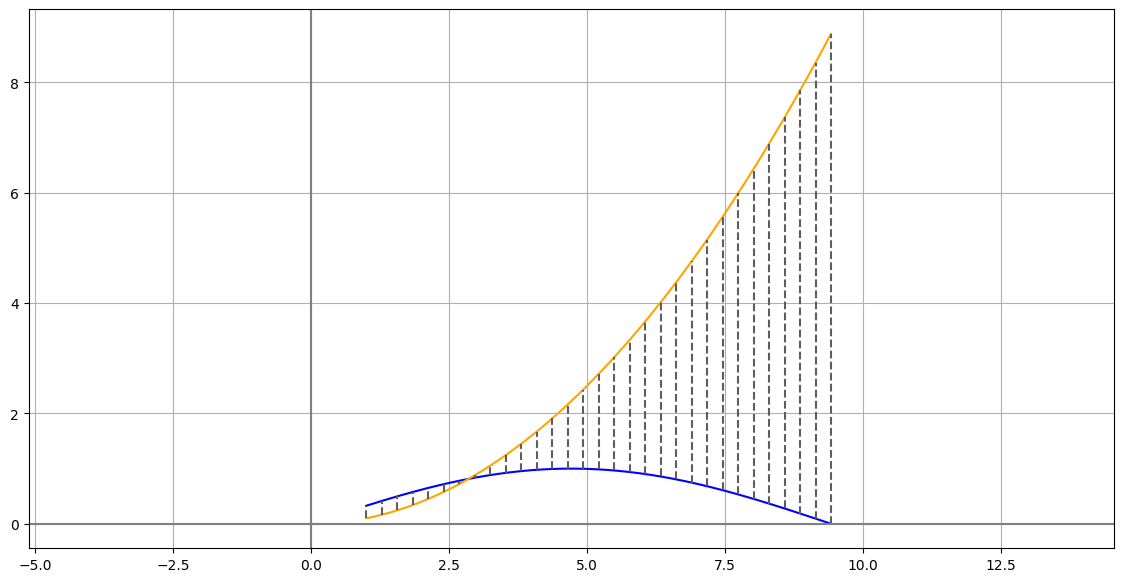

In [2]:
# УПРАЖНЕНИЕ 1
def plot_it(f, g, a, b, n, ls1 = "solid", ls2 = "solid", ls3 = "dashed", color_f = "blue", color_g = "orange"):
    x = np.linspace(a, b, n * 10)
    plt.plot(x, f(x), linestyle = ls1, color = color_f)
    plt.plot(x, g(x), linestyle = ls2, color = color_g)
    
    dx = (x[-1] - x[0]) / n
    for i in range(0, n + 1):
        k_min = min(f(x[0] + i * dx), g(x[0] + i * dx))
        k_max = max(f(x[0] + i * dx), g(x[0] + i * dx))
        plt.vlines(x[0] + i * dx, k_min, k_max, color = "#5D5D5D", linestyles = ls3)

def normalize_plot(axis = "square"):
    plt.axis(axis)
    plt.axvline(x=0, color="gray")
    plt.axhline(y=0, color="gray")
    plt.grid()

def f(x):
    return np.sin(x/3)
def g(x): 
    return x**2 / 10


plt.figure(figsize=(14, 7))
plot_it(f, g, 1, np.pi * 3, 30)
normalize_plot("equal")

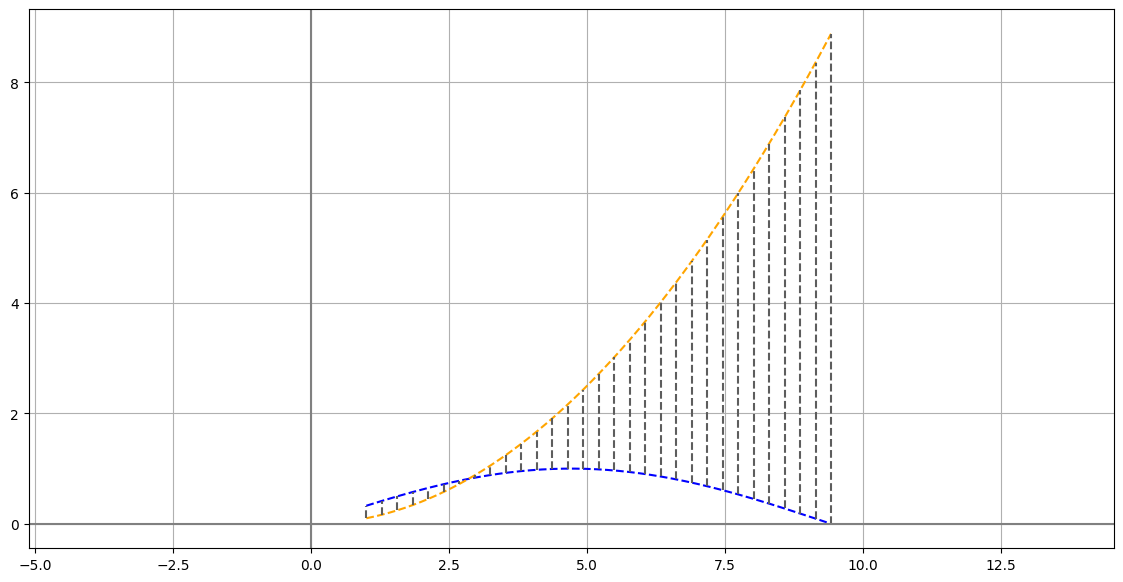

In [3]:
plt.figure(figsize=(14, 7))
plot_it(f, g, 1, np.pi * 3, 30, ls1 = "dashed", ls2 = "dashed")
normalize_plot("equal")

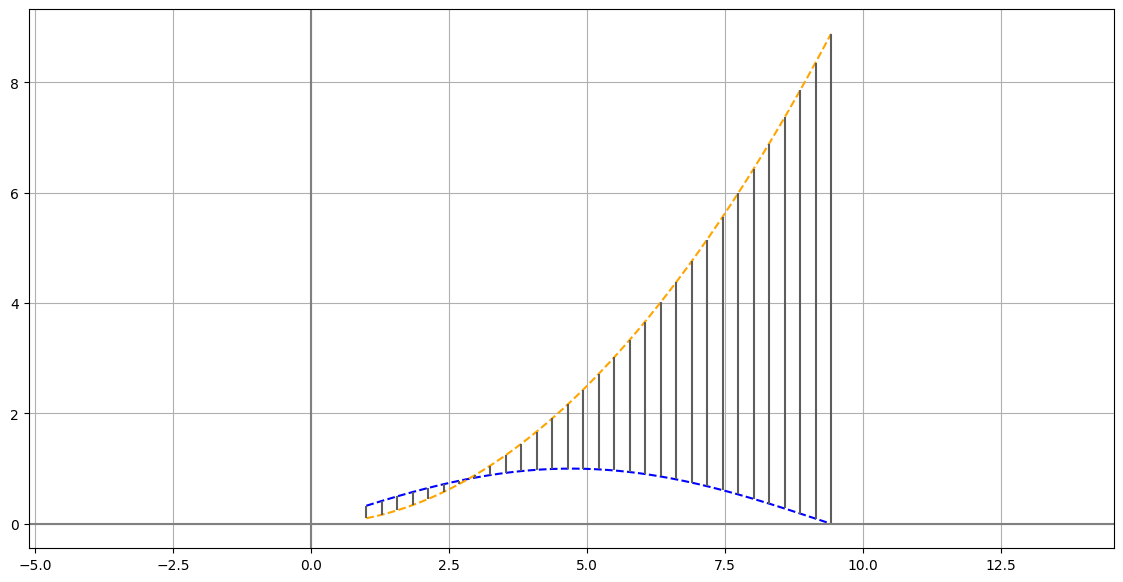

In [4]:
plt.figure(figsize=(14, 7))
plot_it(f, g, 1, np.pi * 3, 30, ls1 = "dashed", ls2 = "dashed", ls3 = "solid")
normalize_plot("equal")

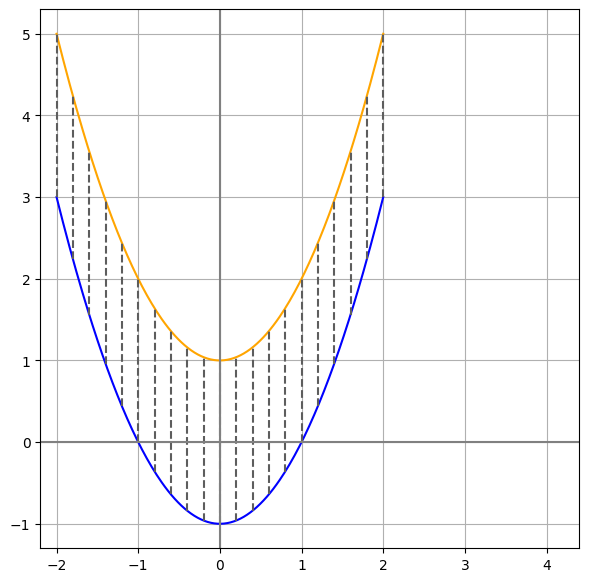

In [5]:
# УПРАЖНЕНИЕ 2
'''
>>> f(x,y) = sqrt(y + 1 - x^2) * sqrt(1 + x^2 - y)
=>
    1) y + 1 - x^2 >= 0
    2) 1 + x^2 - y >= 0
<=>
    1) y >= x^2 - 1
    2) y <= x^2 + 1
'''
plt.figure(figsize=(14, 7))
plot_it(lambda x: x**2 - 1, lambda x: x**2 + 1, a = -2, b = 2, n = 20)
normalize_plot()

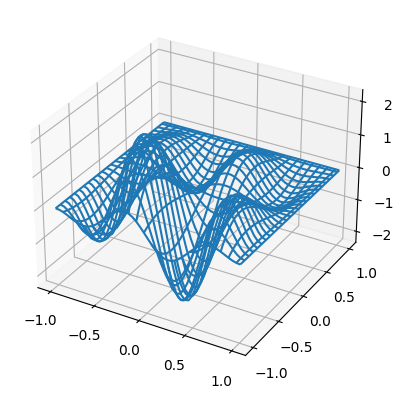

In [6]:
# ПРИМЕР ИЗ МЕТОДИЧКИ
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(x, y)
Z = 4 * np.sin(2 * np.pi * X) * np.cos(1.5 * Y) * (1 - X**2) * Y * (1 - Y)
ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)

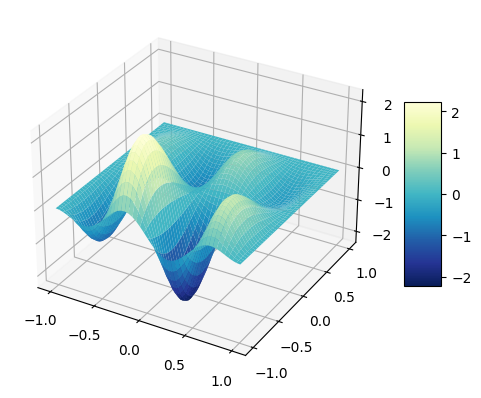

In [7]:
# ПРИМЕР ИЗ МЕТОДИЧКИ
fig, ax = plt.subplots(subplot_kw={"projection" : "3d"})
surface = ax.plot_surface(X, Y, Z, cmap = cm.YlGnBu_r, linewidth = 0)
fig.colorbar(surface, shrink=.5, aspect=5)
plt.show()

C:\Users\Thunboo\AppData\Local\Temp\ipykernel_2728\2649536860.py:7: RuntimeWarning: divide by zero encountered in divide
  Z = 1 / X + 1 / Y
C:\Users\Thunboo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mpl_toolkits\mplot3d\proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


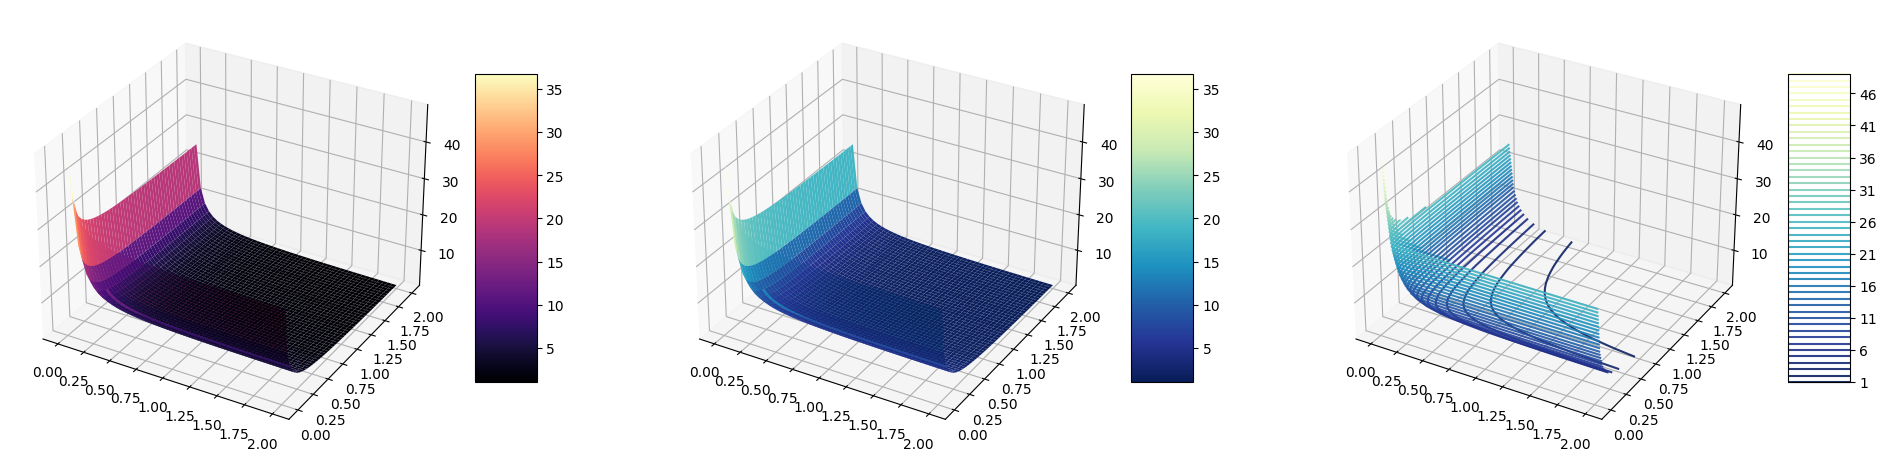

In [8]:
# УПРАЖНЕНИЕ 3-4
fig = plt.figure(figsize=(24, 8)) #plt.figaspect(0.3) 

x = np.linspace(0, 2, 50)
y = np.linspace(0, 2, 50)
X, Y = np.meshgrid(x, y)
Z = 1 / X + 1 / Y

cmap_1 = plt.get_cmap('magma')
cmap_2 = cm.YlGnBu_r

ax = fig.add_subplot(1, 3, 1, projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap = cmap_1, linewidth = 0)
fig.colorbar(surface, shrink = .5, aspect = 5)

ax = fig.add_subplot(1, 3, 2, projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap = cmap_2, linewidth = 0)
fig.colorbar(surface, shrink = .5, aspect = 5)

ax = fig.add_subplot(1, 3, 3, projection='3d')
surface = ax.contour(X, Y, Z, cmap=cm.YlGnBu_r, levels = 50, alpha = 0.9)
fig.colorbar(surface, shrink = .5, aspect = 5)

plt.show()

C:\Users\Thunboo\AppData\Local\Temp\ipykernel_2728\2320890799.py:7: RuntimeWarning: divide by zero encountered in divide
  Z = 1 / X + 1 / Y
C:\Users\Thunboo\AppData\Local\Temp\ipykernel_2728\2320890799.py:15: UserWarning: The following kwargs were not used by contour: 'stride'
  cs = plt.contourf(Z, levels = 200, alpha = 0.9, stride = 0.1)


<Figure size 2400x800 with 0 Axes>

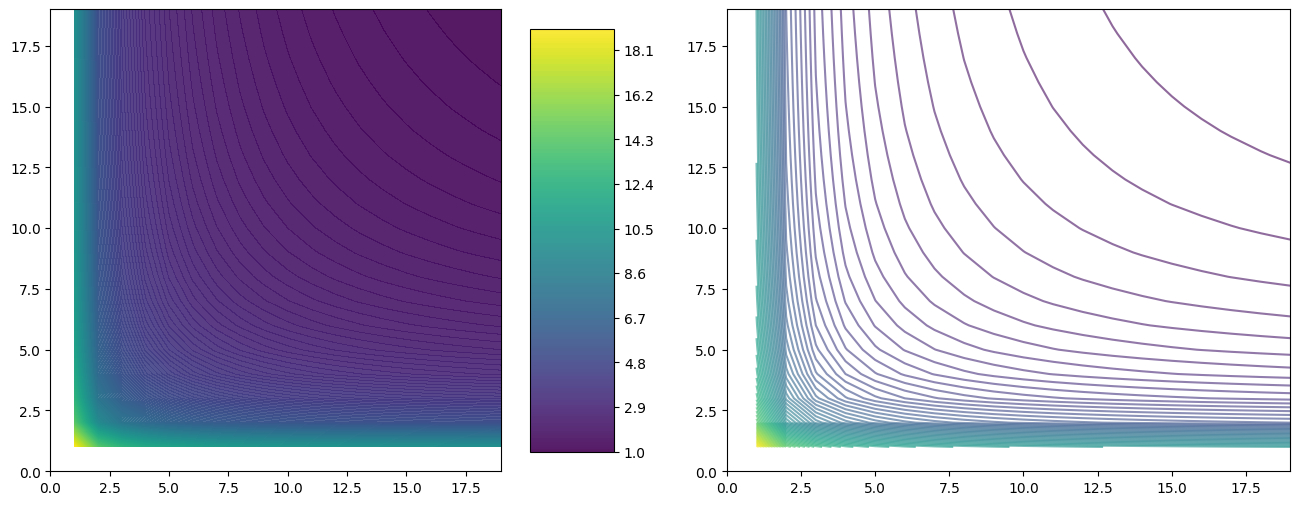

In [9]:
# УПРАЖНЕНИЕ 5 | Плоские линии уровня
fig = plt.figure(figsize=(24, 8))

x = np.linspace(0, 2, 20)
y = np.linspace(0, 2, 20)
X, Y = np.meshgrid(x, y)
Z = 1 / X + 1 / Y

cmap_1 = plt.get_cmap('magma')
cmap_2 = cm.YlGnBu_r

fig = plt.figure(figsize=(16, 6))

ax = fig.add_subplot(1, 2, 1)
cs = plt.contourf(Z, levels = 200, alpha = 0.9, stride = 0.1)
plt.colorbar(cs, shrink=1, aspect=5)

ax = fig.add_subplot(1, 2, 2)
cs = plt.contour(Z, levels = 80, alpha = 0.6)

plt.show()

In [10]:
# fig = plt.figure(figsize=(24,6))
# ax = fig.add_subplot(1, 3, 3, projection="3d")
# ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)


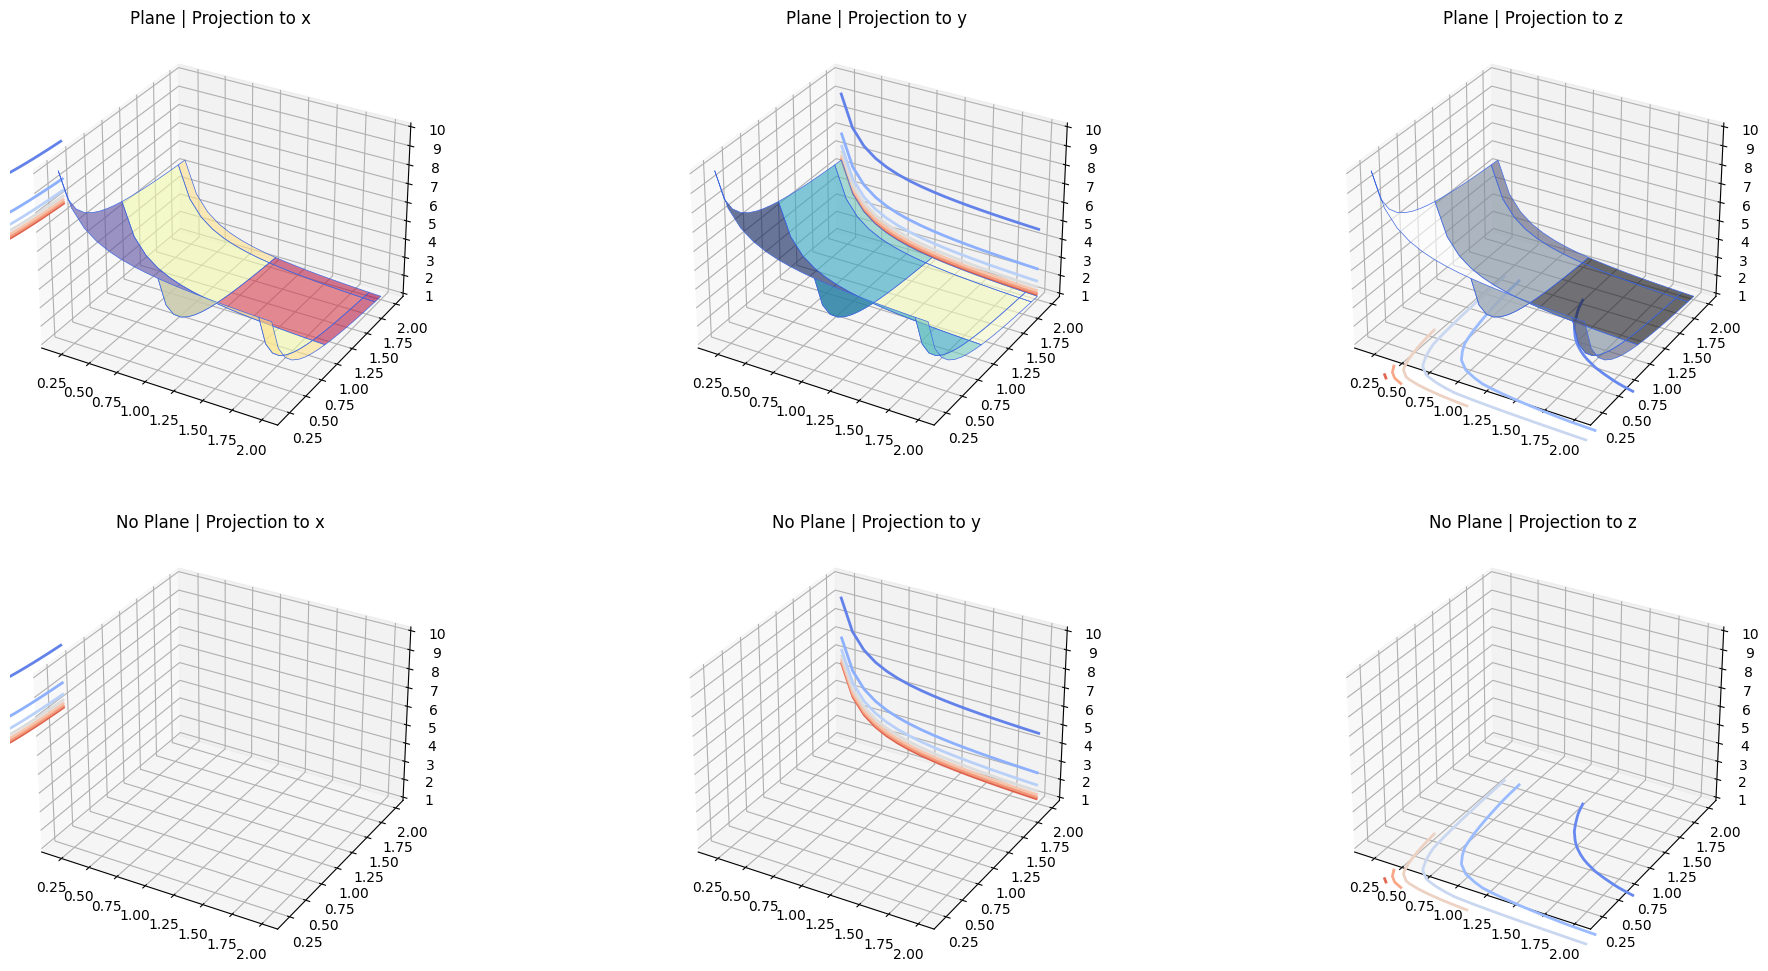

In [11]:
# ПРИМЕР ИЗ МЕТОДИЧКИ
# УПРАЖНЕНИЕ 6
fig1 = plt.figure(figsize=(24, 12))
ax1 = fig1.add_subplot(231, projection='3d')
ax2 = fig1.add_subplot(232, projection='3d')
ax3 = fig1.add_subplot(233, projection='3d')
ax4 = fig1.add_subplot(234, projection='3d')
ax5 = fig1.add_subplot(235, projection='3d')
ax6 = fig1.add_subplot(236, projection='3d')

x = np.linspace(0.2, 2, 20 - 2)
y = np.linspace(0.2, 2, 20 - 2)
X, Y = np.meshgrid(x, y)
Z = 1 / X + 1 / Y

ax1.plot_surface(X, Y, Z, cmap = "Spectral", edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.6)
ax2.plot_surface(X, Y, Z, cmap = "YlGnBu", edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.6)
ax3.plot_surface(X, Y, Z, cmap = "bone", edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.6)

ax1.contour(X, Y, Z, zdir='x', offset=-1, cmap='coolwarm', linewidths = 2)
ax2.contour(X, Y, Z, zdir='y', offset= 2, cmap='coolwarm', linewidths = 2)
ax3.contour(X, Y, Z, zdir='z', offset=-1, cmap='coolwarm', linewidths = 2)
ax4.contour(X, Y, Z, zdir='x', offset=-1, cmap='coolwarm', linewidths = 2)
ax5.contour(X, Y, Z, zdir='y', offset= 2, cmap='coolwarm', linewidths = 2)
ax6.contour(X, Y, Z, zdir='z', offset=-1, cmap='coolwarm', linewidths = 2)

ax1.set_title("Plane | Projection to x")
ax2.set_title("Plane | Projection to y")
ax3.set_title("Plane | Projection to z")
ax4.set_title("No Plane | Projection to x")
ax5.set_title("No Plane | Projection to y")
ax6.set_title("No Plane | Projection to z") 
plt.show()


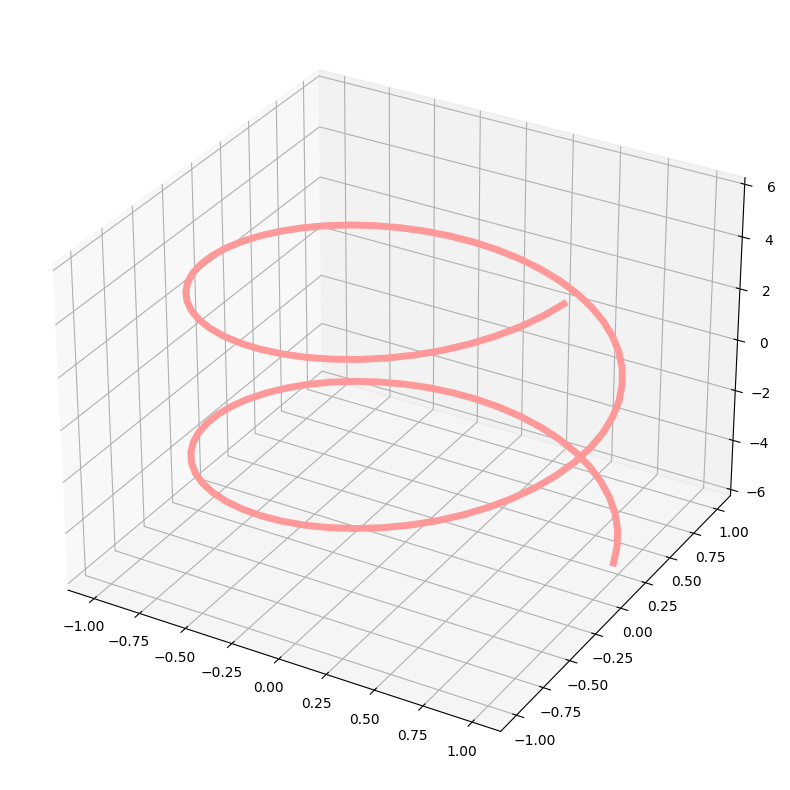

In [12]:
# ПОСТРОЕНИЕ ПАРАМЕТРИЧЕСКИ ЗАДАННЫХ ПОВЕРХНОСТЕЙ И ЛИНИЙ
t = np.linspace(-6, 6, 100)
x = np.cos(t)
y = np.sin(t)
z = t

fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1, 1, 1, projection = "3d")
ax.plot(x, y, z, linewidth = 5, color = "#FF9999")


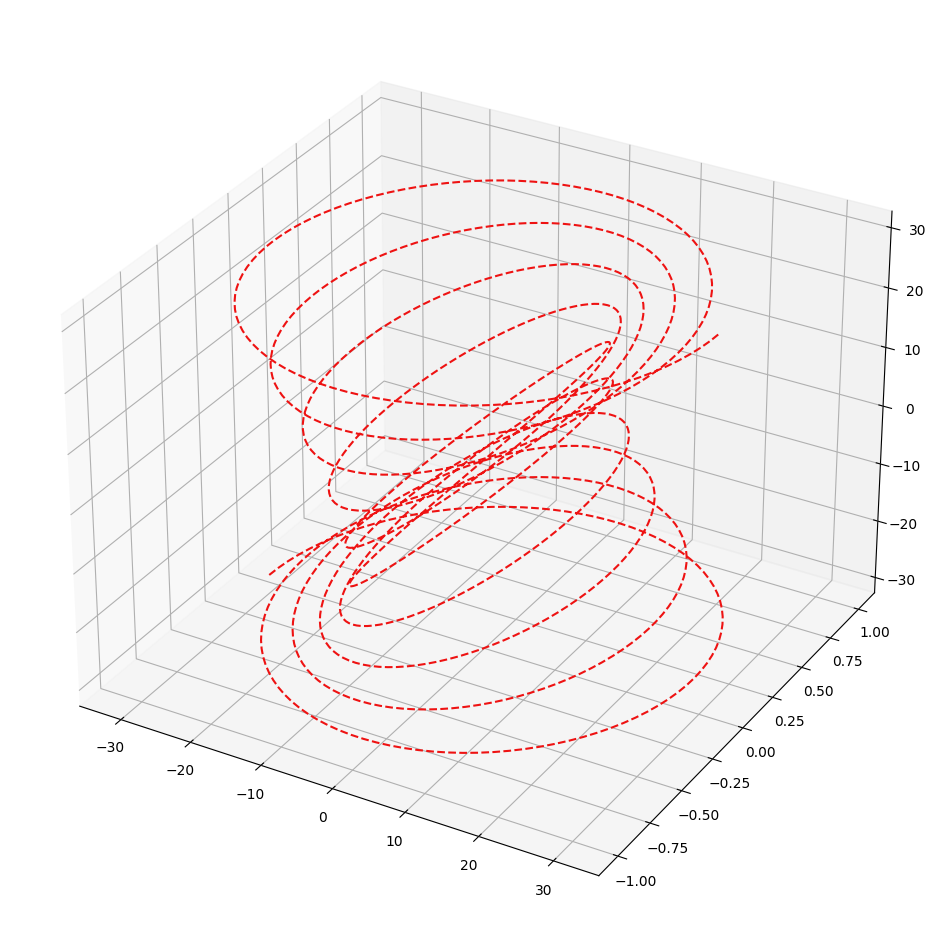

In [13]:
# УПРАЖНЕНИЕ 7
t = np.linspace(-10 * np.pi, 10 * np.pi, 1000)
x = t * np.cos(t)
y = np.sin(t)
z = t
fig = plt.figure(figsize = (24, 12))
ax = fig.add_subplot(projection = "3d")
ax.plot(x, y, z, color = "#EE1212", linestyle = "dashed")

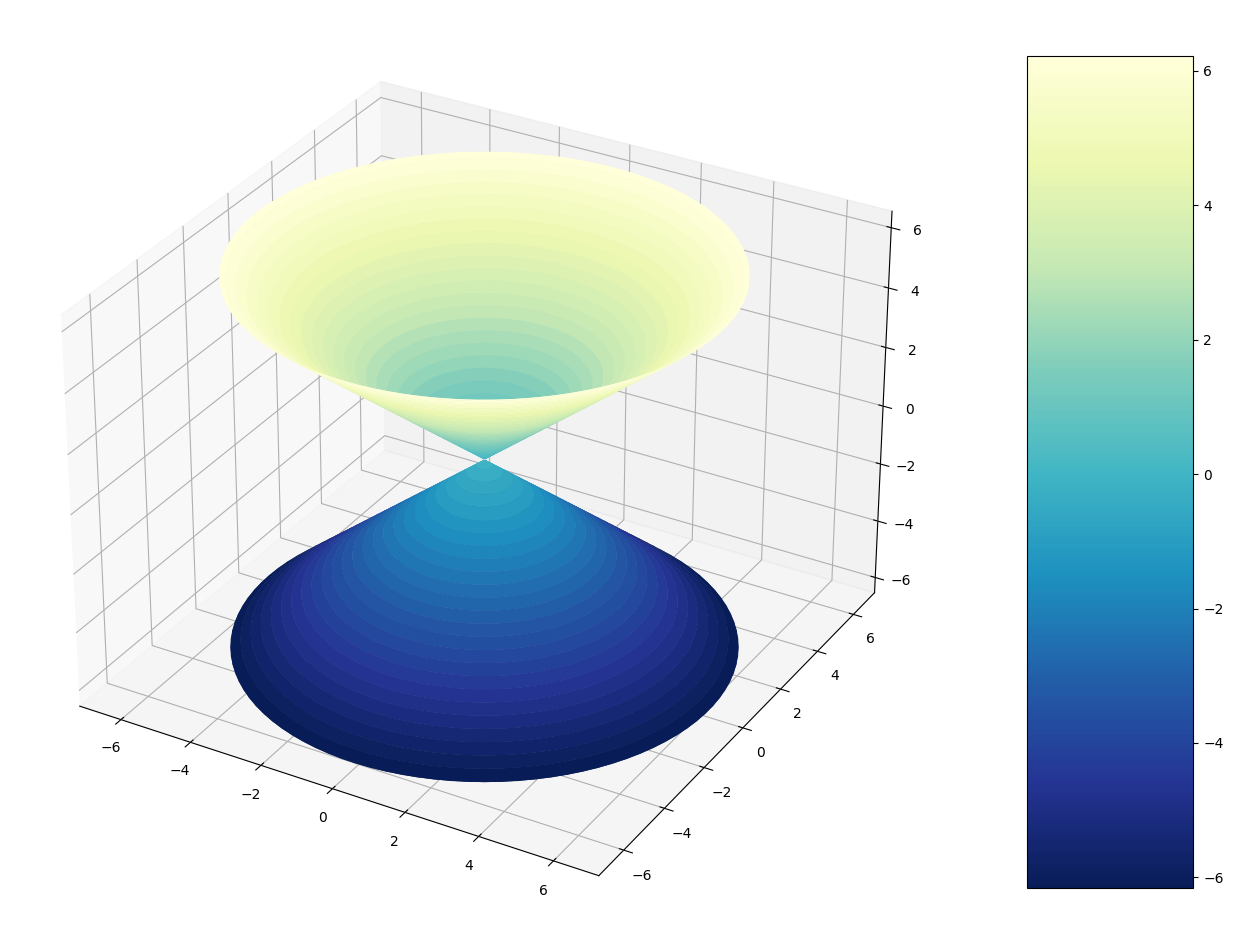

In [14]:
# ПРИМЕР 7 ИЗ МЕТОДИЧКИ
u = np.linspace(-2 * np.pi, 2* np.pi, 100)
v = np.linspace(-2 * np.pi, 2* np.pi, 100)
U, V = np.meshgrid(u, v)
X = U * np.cos(V)
Y = U * np.sin(V)
Z = U

fig = plt.figure(figsize = (24, 12))
ax = fig.add_subplot(projection = "3d")
surface = ax.plot_surface(X, Y, Z, cmap = cmap_2)
fig.colorbar(surface, shrink = 0.9, aspect = 5)

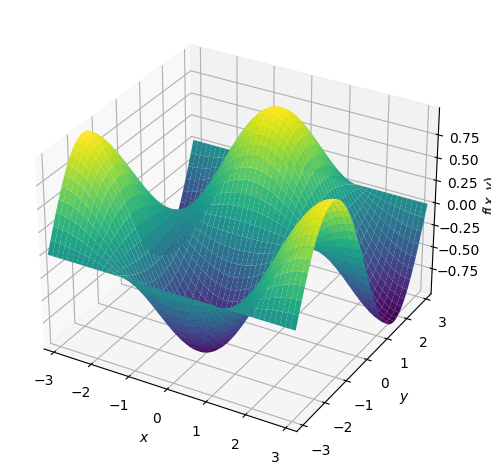

In [15]:
# ПРИМЕР 8 ИЗ МЕТОДИЧКИ
x, y = sp.symbols("x y")
sp_plot3d(sp.cos(x) * sp.sin(y), (x, -sp.pi, sp.pi), (y, -sp.pi, sp.pi))

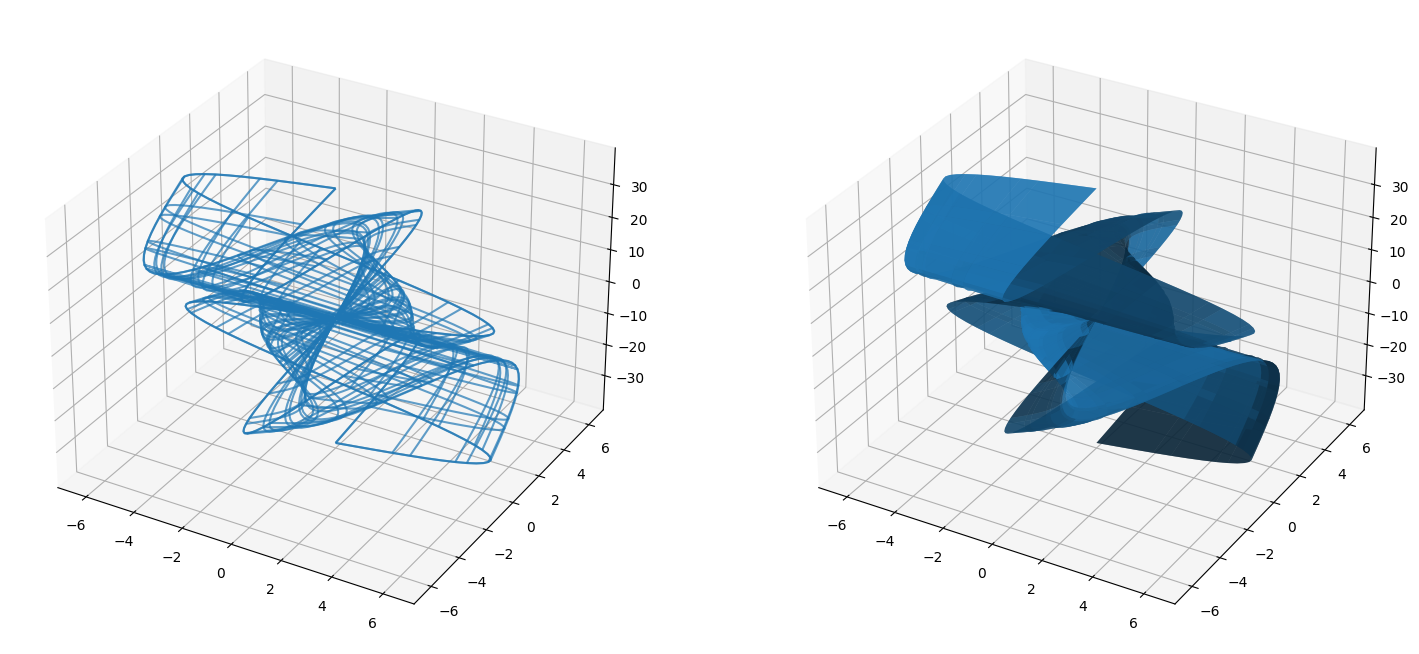

In [16]:
# УПРАЖНЕНИЕ 8
u = np.linspace(-2 * np.pi, 2* np.pi, 100)
v = np.linspace(-2 * np.pi, 2* np.pi, 100)
U, V = np.meshgrid(u, v)
X = np.sin(U) * V
Y = U * np.sin(V)
Z = U * V

fig = plt.figure(figsize=(18, 9))
ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.plot_wireframe(X, Y, Z, rstride = 4, cstride = 4, alpha = 0.7)
ax = fig.add_subplot(1, 2, 2, projection="3d")
ax.plot_surface(X, Y, Z, rstride = 4, cstride = 4, alpha = 0.7)

### ЗАДАНИЯ ДЛЯ САМОСТОЯТЕЛЬНОЙ РАБОТЫ

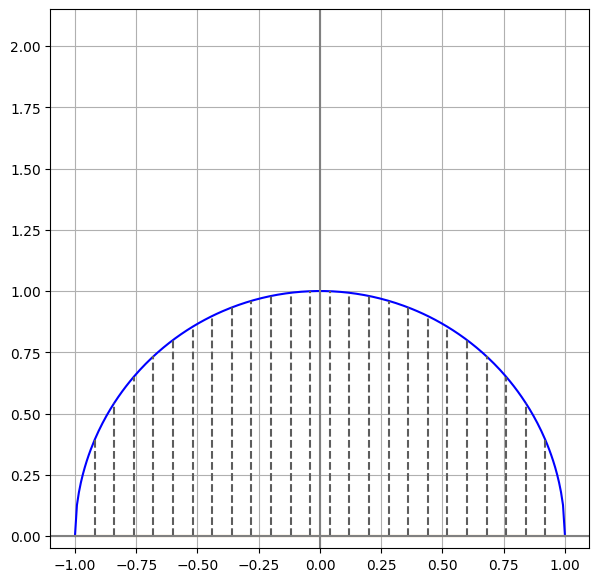

In [17]:
# УПРАЖНЕНИЕ С1
'''
>>> f(x,y) = ln(1 - x^2 - y^2) * ln(y)
=>
    1) 1 - x^2 - x^2 > 0
    2) y > 0
<=>
    1) x^2 + y^2 <= 1 : 
        1.1) y <=  sqrt(1 - x^2)
        1.2) y >= -sqrt(1 - x^2)
    2) y > 0
'''
plt.figure(figsize=(14, 7))
plot_it(lambda x:  np.sqrt(1 - x**2), lambda x: x * 0, a = -1, b = 1, n = 25)
normalize_plot()

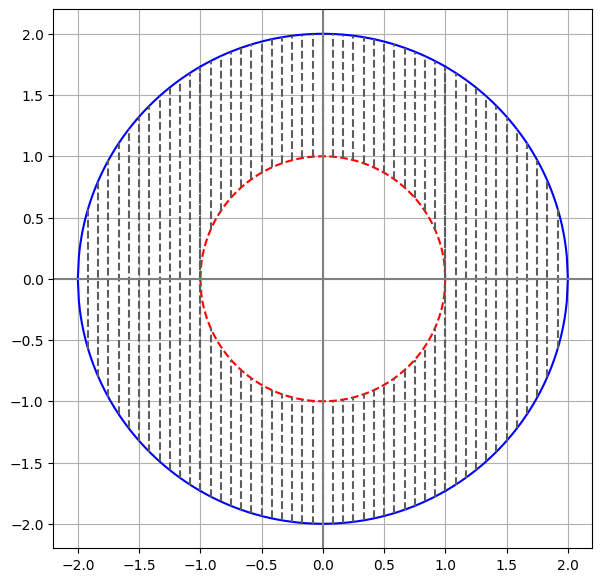

In [18]:
# УПРАЖНЕНИЕ С1
# УПРАЖНЕНИЕ 2

'''
>>> f(x,y) = sqrt( (4 - x^2 - y^2) / (x^2 + y^2 - 1))
=>
    (4 - x^2 - y^2) / (x^2 + y^2 - 1) >= 0
<=>
    [ 1) x^2 + y^2 <= 4 : 
    [     1.1) y <=  sqrt(4 - x^2)
    [     1.2) y >= -sqrt(4 - x^2)
    [ 2) x^2 + y^2 - 1 > 0
    [     2.1) y >  sqrt(1 - x^2)
    [     2.2) y < -sqrt(1 - x^2)
    [ 1 < R <= 2

    или

    [ 1) x^2 + y^2 >= 4 : 
    [  ! x^2 + y^2 = R^2 => R >= 2
    [ 2) x^2 + y^2 - 1 < 0
    [  ! x^2 + y^2 = R^2 => R < 1
    [
    [ => Нет решения
'''
plt.figure(figsize=(14, 7))

plot_it(lambda x:  np.sqrt(4 - x**2), lambda x: -np.sqrt(4 - x**2), a = -2, b = -1, n = 12, color_g = "blue")
plot_it(lambda x:  np.sqrt(4 - x**2), lambda x:  np.sqrt(1 - x**2), a = -1, b = 1, n = 24, color_g = "red", ls2 = "dashed")
plot_it(lambda x: -np.sqrt(4 - x**2), lambda x: -np.sqrt(1 - x**2), a = -1, b = 1, n = 24, color_g = "red", ls2 = "dashed")
plot_it(lambda x:  np.sqrt(4 - x**2), lambda x: -np.sqrt(4 - x**2), a = 1, b = 2, n = 12, color_g = "blue")
normalize_plot()

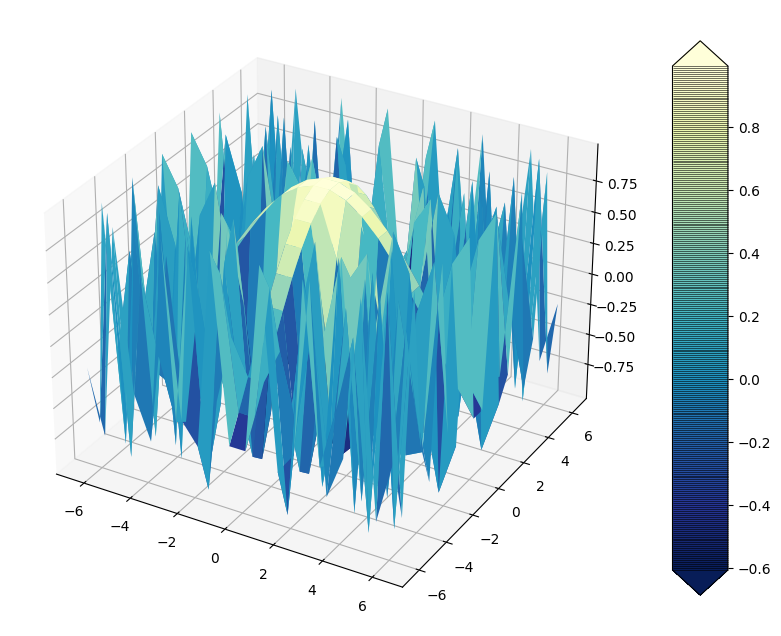

In [19]:
# УПРАЖНЕНИЕ 2С
# a)
x = np.linspace(-2 * np.pi, 2 * np.pi, 20)
y = np.linspace(-2 * np.pi, 2 * np.pi, 20)
X, Y = np.meshgrid(x, y)
Z = np.cos(X * Y)

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(projection = "3d")
# surface = ax.plot_surface(X, Y, Z, cmap = cmap_2)
# fig.colorbar(surface, shrink = 0.9, aspect = 5)
surface = ax.plot_surface(X, Y, Z, cmap = cmap_2)
fig.colorbar(surface, shrink = 0.9, aspect = 10, extend = "both", drawedges = True)

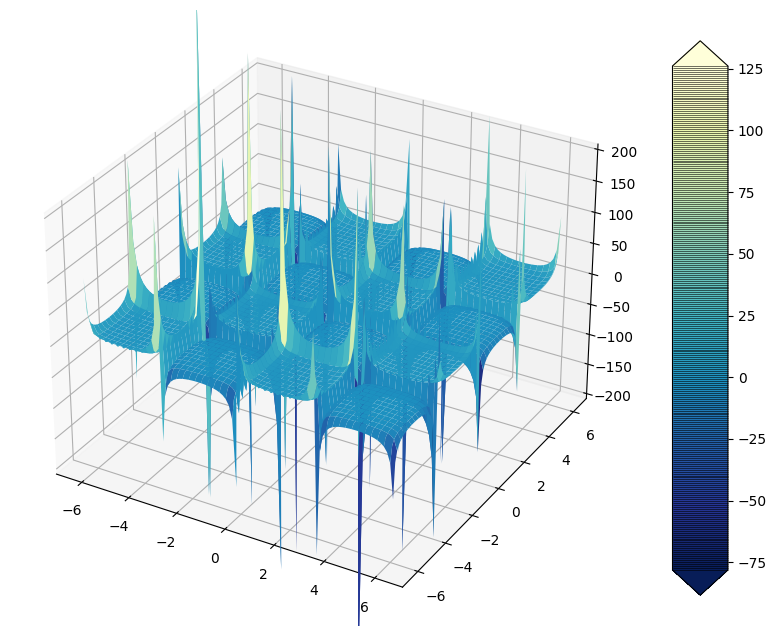

In [20]:
# УПРАЖНЕНИЕ 2С
# б)
x = np.linspace(-2 * np.pi + 0.1, 2 * np.pi - 0.1, 100)
y = np.linspace(-2 * np.pi + 0.1, 2 * np.pi - 0.1, 100)
X, Y = np.meshgrid(x, y)
Z = 1 / (np.sin(X) * np.sin(Y))

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(projection = "3d")
ax.set_zlim(zmin = -200, zmax = 200)
surface = ax.plot_surface(X, Y, Z, cmap = cmap_2)
fig.colorbar(surface, shrink = 0.9, aspect = 10, extend = 'both', drawedges = True)

Text(0.5, 0.92, 'Поверхности из линий уровня')

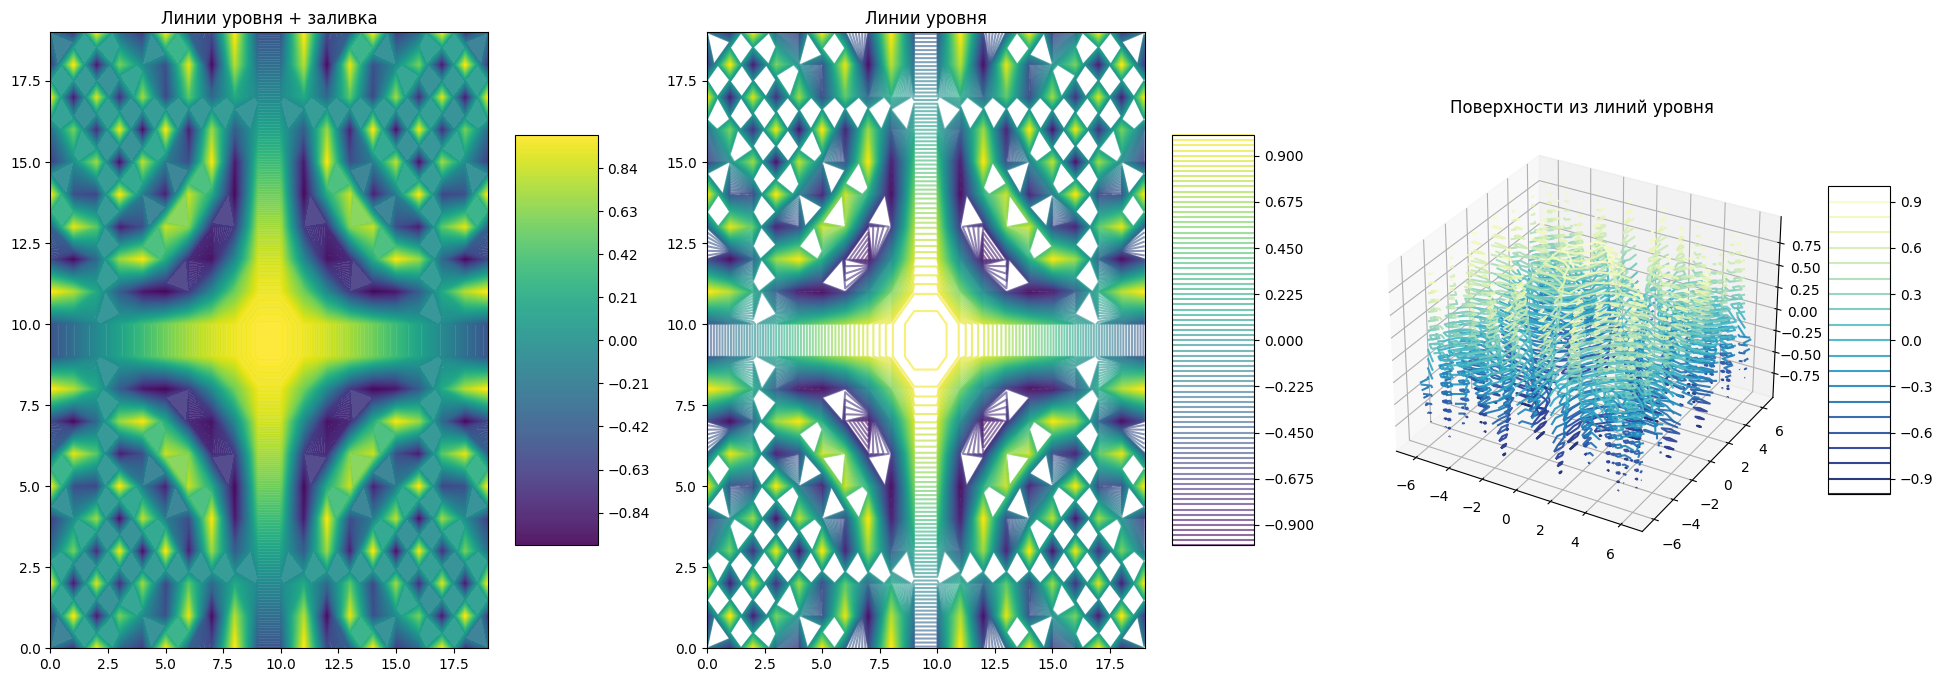

In [21]:
# УПРАЖНЕНИЕ С3
# а)
x = np.linspace(-2 * np.pi, 2 * np.pi, 20)
y = np.linspace(-2 * np.pi, 2 * np.pi, 20)
X, Y = np.meshgrid(x, y)
Z = np.cos(X * Y)

fig = plt.figure(figsize = (24, 8))
ax = fig.add_subplot(1, 3, 1)
cs = plt.contourf(Z, levels = 200, alpha = 0.9)
plt.colorbar(cs, shrink=1, aspect=5)
ax.set_title("Линии уровня + заливка")

ax = fig.add_subplot(1, 3, 2)
cs = plt.contour(Z, levels = 80, alpha = 0.6)
plt.colorbar(cs, shrink=1, aspect=5)
ax.set_title("Линии уровня")

ax = fig.add_subplot(1, 3, 3, projection='3d')
surface = ax.contour(X, Y, Z, cmap=cm.YlGnBu_r, levels = 20, alpha = 0.9)
fig.colorbar(surface, shrink = .5, aspect = 5)
ax.set_title("Поверхности из линий уровня")

Text(0.5, 0.92, 'Поверхности из линий уровня')

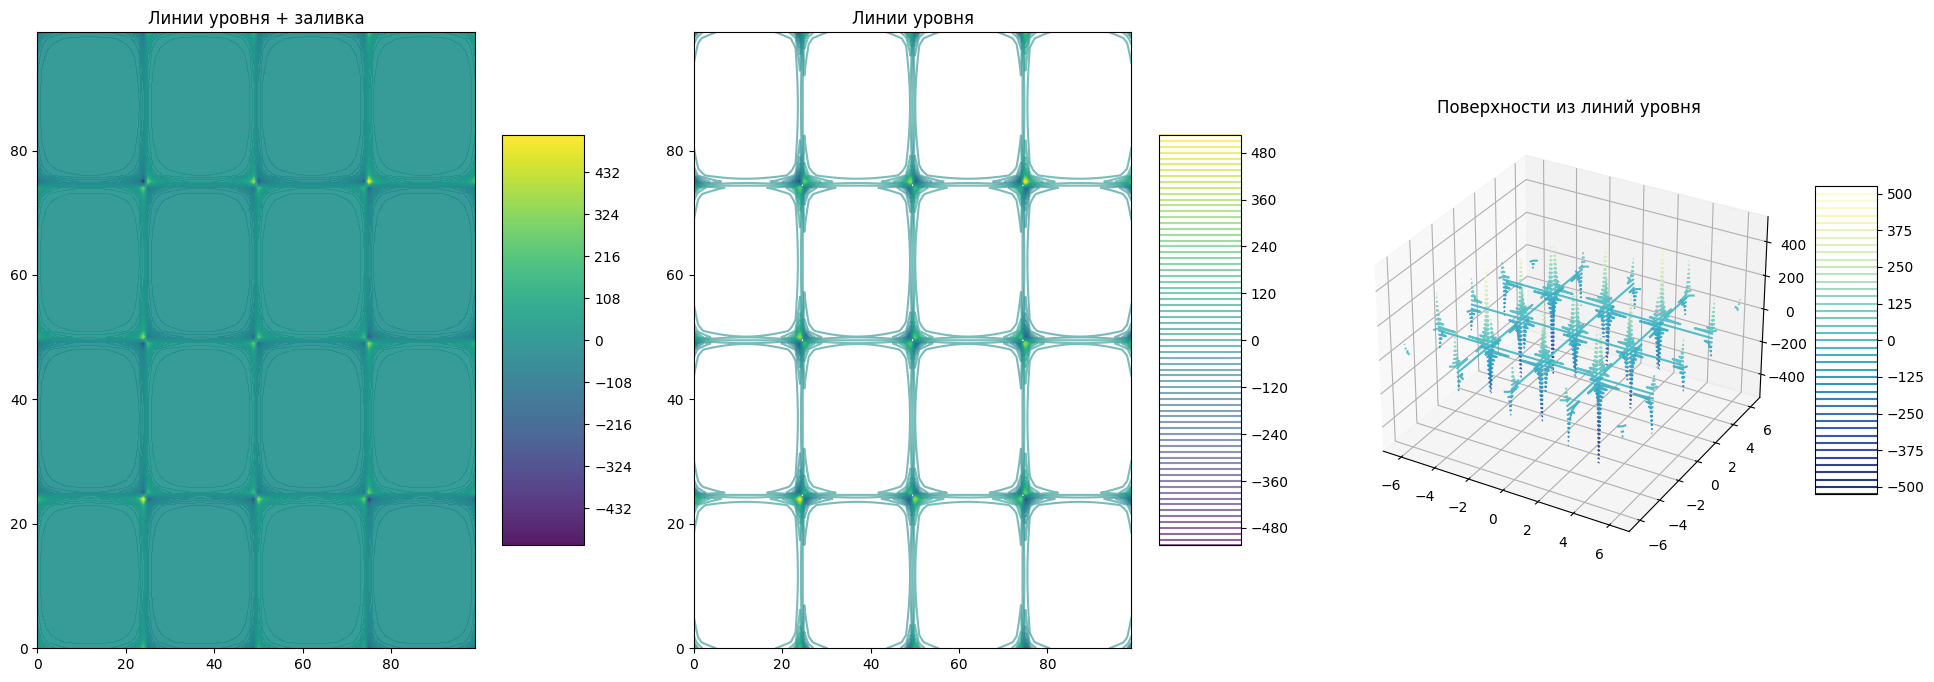

In [22]:
# УПРАЖНЕНИЕ С3
# б)
x = np.linspace(-2 * np.pi + 0.1, 2 * np.pi - 0.1, 100)
y = np.linspace(-2 * np.pi + 0.1, 2 * np.pi - 0.1, 100)
X, Y = np.meshgrid(x, y)
Z = 1 / (np.sin(X) * np.sin(Y))

fig = plt.figure(figsize = (24, 8))
ax = fig.add_subplot(1, 3, 1)
cs = plt.contourf(Z, levels = 200, alpha = 0.9)
plt.colorbar(cs, shrink=1, aspect=5)
ax.set_title("Линии уровня + заливка")

ax = fig.add_subplot(1, 3, 2)
cs = plt.contour(Z, levels = 80, alpha = 0.6)
plt.colorbar(cs, shrink=1, aspect=5)
ax.set_title("Линии уровня")

ax = fig.add_subplot(1, 3, 3, projection='3d')
surface = ax.contour(X, Y, Z, cmap=cm.YlGnBu_r, levels = 50, alpha = 0.9)
fig.colorbar(surface, shrink = .5, aspect = 5)
ax.set_title("Поверхности из линий уровня")

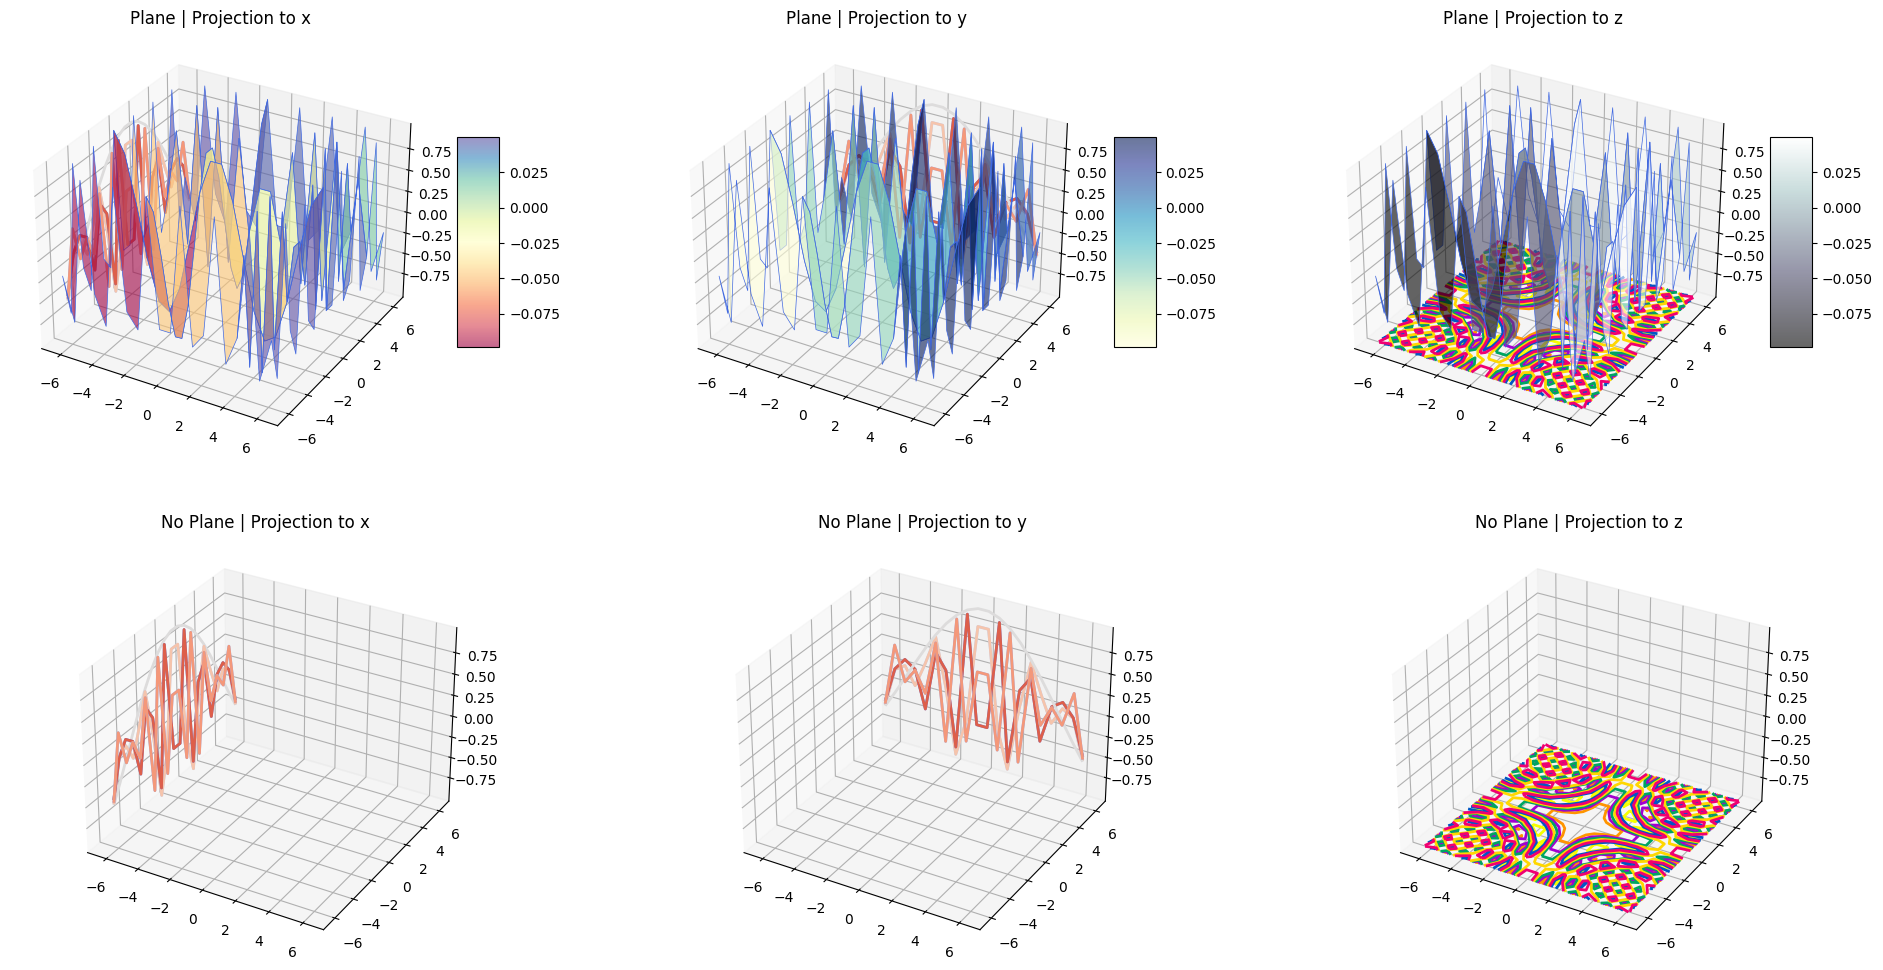

In [23]:
# C4
# a)
fig1 = plt.figure(figsize=(24, 12))
ax1 = fig1.add_subplot(231, projection='3d')
ax2 = fig1.add_subplot(232, projection='3d')
ax3 = fig1.add_subplot(233, projection='3d')
ax4 = fig1.add_subplot(234, projection='3d')
ax5 = fig1.add_subplot(235, projection='3d')
ax6 = fig1.add_subplot(236, projection='3d')

x = np.linspace(-2 * np.pi, 2 * np.pi, 20)
y = np.linspace(-2 * np.pi, 2 * np.pi, 20)
X, Y = np.meshgrid(x, y)
Z = np.cos(X * Y)

surface1 = ax1.plot_surface(X, Y, Z, cmap = "Spectral", edgecolor='royalblue', lw = 0.5, rstride = 8, cstride = 8, alpha = 0.6)
fig.colorbar(surface1, shrink = .5, aspect = 5)

surface2 = ax2.plot_surface(X, Y, Z, cmap = "YlGnBu", edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.6)
fig.colorbar(surface2, shrink = .5, aspect = 5)

surface3 = ax3.plot_surface(X, Y, Z, cmap = "bone", edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.6)
fig.colorbar(surface3, shrink = .5, aspect = 5)

ax1.contour(X, Y, Z, zdir='x', offset=-6, cmap='coolwarm', linewidths = 2)
ax2.contour(X, Y, Z, zdir='y', offset= 6, cmap='coolwarm', linewidths = 2)
ax3.contour(X, Y, Z, zdir='z', offset=-1, cmap='prism', linewidths = 2)
ax4.contour(X, Y, Z, zdir='x', offset=-6, cmap='coolwarm', linewidths = 2)
ax5.contour(X, Y, Z, zdir='y', offset= 6, cmap='coolwarm', linewidths = 2)
ax6.contour(X, Y, Z, zdir='z', offset=-1, cmap='prism', linewidths = 2)

ax1.set_title("Plane | Projection to x")
ax2.set_title("Plane | Projection to y")
ax3.set_title("Plane | Projection to z")
ax4.set_title("No Plane | Projection to x")
ax5.set_title("No Plane | Projection to y")
ax6.set_title("No Plane | Projection to z")
plt.show()


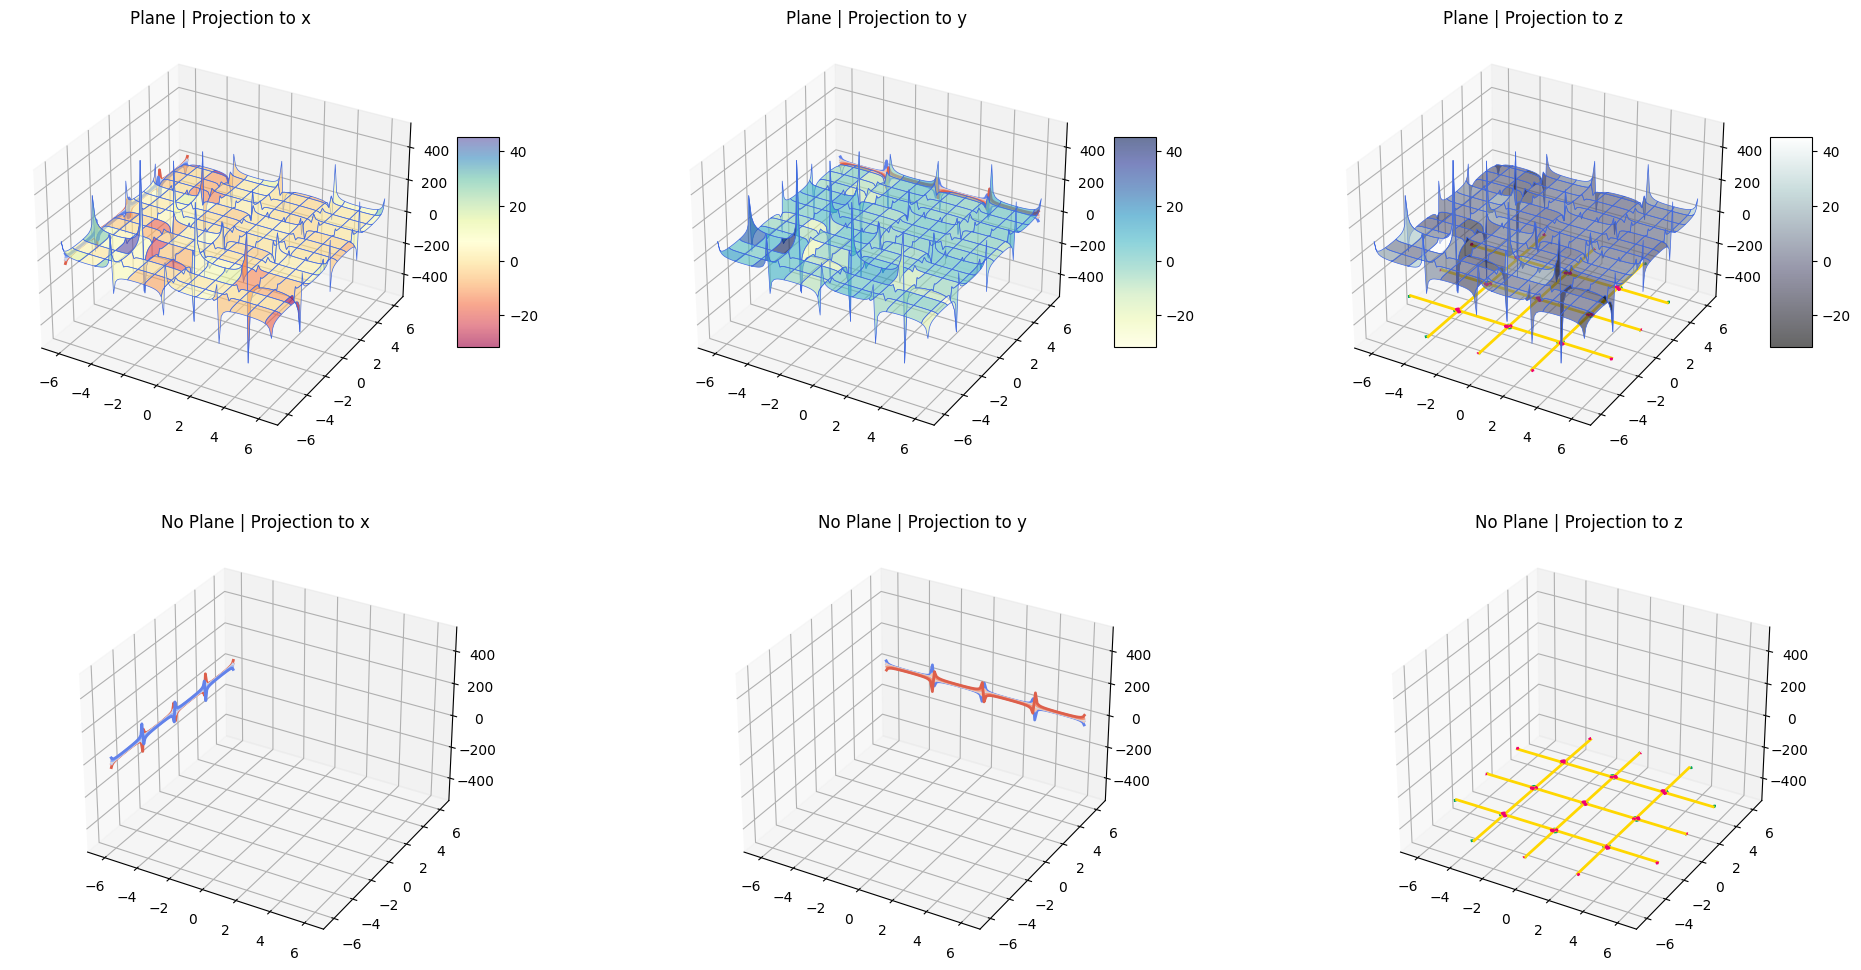

In [24]:
# C4
# б)
fig1 = plt.figure(figsize=(24, 12))
ax1 = fig1.add_subplot(231, projection='3d')
ax2 = fig1.add_subplot(232, projection='3d')
ax3 = fig1.add_subplot(233, projection='3d')
ax4 = fig1.add_subplot(234, projection='3d')
ax5 = fig1.add_subplot(235, projection='3d')
ax6 = fig1.add_subplot(236, projection='3d')

x = np.linspace(-2 * np.pi + 0.1, 2 * np.pi - 0.1, 100)
y = np.linspace(-2 * np.pi + 0.1, 2 * np.pi - 0.1, 100)
X, Y = np.meshgrid(x, y)
Z = 1 / (np.sin(X) * np.sin(Y))

surface1 = ax1.plot_surface(X, Y, Z, cmap = "Spectral", edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.6)
fig.colorbar(surface1, shrink = .5, aspect = 5)

surface2 = ax2.plot_surface(X, Y, Z, cmap = "YlGnBu", edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.6)
fig.colorbar(surface2, shrink = .5, aspect = 5)

surface3 = ax3.plot_surface(X, Y, Z, cmap = "bone", edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.6)
fig.colorbar(surface3, shrink = .5, aspect = 5)

ax1.contour(X, Y, Z, zdir='x', offset=-6,   cmap='coolwarm', linewidths = 2)
ax2.contour(X, Y, Z, zdir='y', offset= 6,   cmap='coolwarm', linewidths = 2)
ax3.contour(X, Y, Z, zdir='z', offset=-400, cmap='prism',    linewidths = 2)
ax4.contour(X, Y, Z, zdir='x', offset=-6,   cmap='coolwarm', linewidths = 2)
ax5.contour(X, Y, Z, zdir='y', offset= 6,   cmap='coolwarm', linewidths = 2)
ax6.contour(X, Y, Z, zdir='z', offset=-400, cmap='prism',    linewidths = 2)

ax1.set_title("Plane | Projection to x")
ax2.set_title("Plane | Projection to y")
ax3.set_title("Plane | Projection to z")
ax4.set_title("No Plane | Projection to x")
ax5.set_title("No Plane | Projection to y")
ax6.set_title("No Plane | Projection to z")
plt.show()
